In [1]:
import pandas as pd

In [115]:
DF = pd.read_csv("D://Study//BA//March-April Classes//Par-Logistic-Regression-PBA//data//bank-full.csv")

In [116]:
DF.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45202.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.954714,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,11.539144,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [117]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


In [118]:
DF.isna().sum()

Id           0
age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [119]:
DF.age = DF.age.fillna(DF["age"].mean())

In [120]:
DF.balance = DF.balance.fillna(DF["balance"].mean())

In [121]:
DF.isnull().sum()

Id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:>

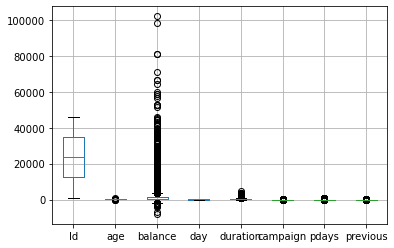

In [122]:
DF.boxplot()

In [123]:
DF.select_dtypes(exclude="object").nunique()

Id          45211
age            80
balance      7169
day            31
duration     1573
campaign       48
pdays         559
previous       41
dtype: int64

In [124]:
import numpy as np

<AxesSubplot:>

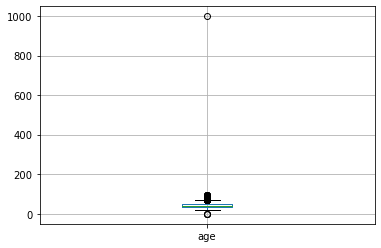

In [125]:
DF.boxplot("age")

<AxesSubplot:>

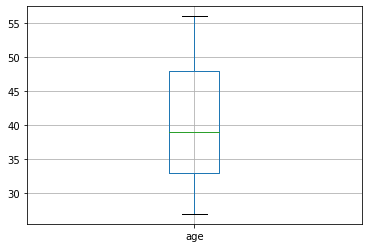

In [126]:
max=DF['age'].quantile(0.90)
new=np.where(DF['age']>max,max,DF['age'])
DF.age=new

min=DF['age'].quantile(0.05)
new=np.where(DF['age']<min,min,DF['age'])
DF.age=new
DF.boxplot('age')

<AxesSubplot:>

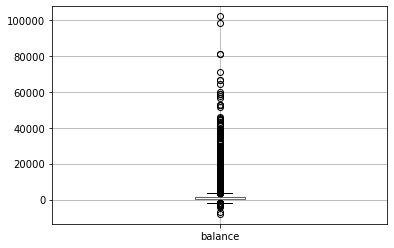

In [127]:
DF.boxplot('balance')

<AxesSubplot:>

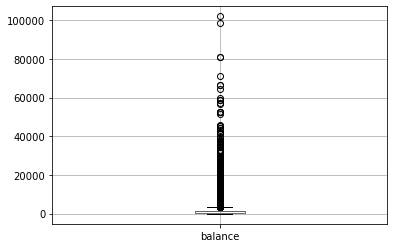

In [128]:
max=DF['balance'].quantile(0.85)
new=np.where(DF['balance']>max,max,DF['balance'])
DF.age=new

min=DF['balance'].quantile(0.05)
new=np.where(DF['balance']<min,min,DF['balance'])
DF.balance=new
DF.boxplot('balance')

<AxesSubplot:>

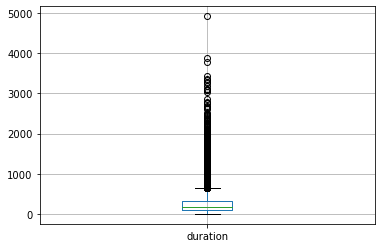

In [129]:
DF.boxplot("duration")

<AxesSubplot:>

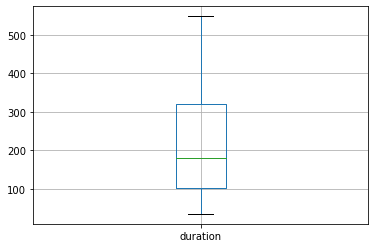

In [130]:
max=DF['duration'].quantile(0.90)
new=np.where(DF['duration']>max,max,DF['duration'])
DF.duration=new

min=DF['duration'].quantile(0.05)
new=np.where(DF['duration']<min,min,DF['duration'])
DF.duration=new
DF.boxplot('duration')

<AxesSubplot:>

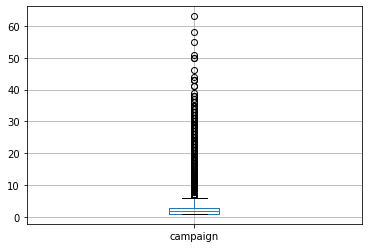

In [131]:
DF.boxplot("campaign")

<AxesSubplot:>

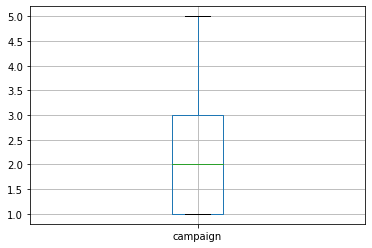

In [132]:
max=DF['campaign'].quantile(0.90)
new=np.where(DF['campaign']>max,max,DF['campaign'])
DF.campaign=new

min=DF['campaign'].quantile(0.05)
new=np.where(DF['campaign']<min,min,DF['campaign'])
DF.campaign=new
DF.boxplot('campaign')

In [133]:
del DF["Id"]

In [134]:
DF['y'].unique()

array(['no', 'yes'], dtype=object)

In [135]:
DF.y=pd.Series(np.where(DF.y=='yes',1,0),
           DF.index)

In [136]:
DF["y"].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [137]:
DFn = DF.select_dtypes(exclude="object")

In [138]:
corr = DFn.corr()

<AxesSubplot:>

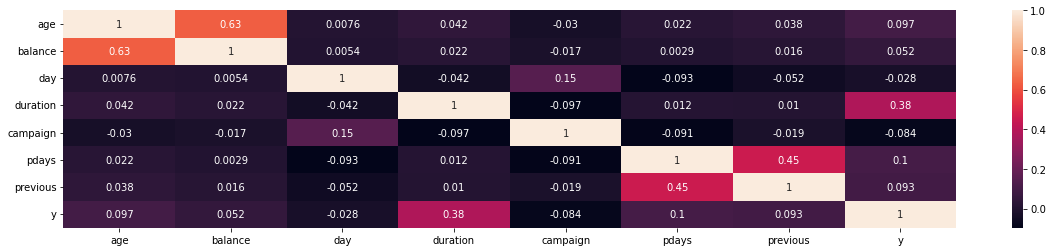

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
sns.heatmap(corr,annot=True)

In [145]:
DF.select_dtypes(include="object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        45211 non-null  object
 1   marital    45211 non-null  object
 2   education  45211 non-null  object
 3   default    45211 non-null  object
 4   housing    45211 non-null  object
 5   loan       45211 non-null  object
 6   contact    45211 non-null  object
 7   month      45211 non-null  object
 8   poutcome   45211 non-null  object
dtypes: object(9)
memory usage: 3.1+ MB


In [147]:
DF.select_dtypes(include="object").nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

In [149]:
DF = pd.get_dummies(DF,columns=['default','housing','loan'],drop_first=True)

In [151]:
DF.select_dtypes(include="object").nunique()

job          12
marital       3
education     4
contact       3
month        12
poutcome      4
dtype: int64

In [152]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
DF['job'] = le.fit_transform(DF['job'])
DF['marital'] = le.fit_transform(DF['marital'])
DF['education'] = le.fit_transform(DF['education'])
DF['contact'] = le.fit_transform(DF['contact'])
DF['month'] = le.fit_transform(DF['month'])
DF['poutcome'] = le.fit_transform(DF['poutcome'])

In [153]:
DF.select_dtypes(include="object").nunique()

Series([], dtype: float64)

In [154]:
DF.select_dtypes(exclude="object").nunique()

age            3403
job              12
marital           3
education         4
balance        6425
contact           3
day              31
month            12
duration        514
campaign          5
pdays           559
previous         41
poutcome          4
y                 2
default_yes       2
housing_yes       2
loan_yes          2
dtype: int64

In [199]:
target = DF.y
predictor = DF.drop(['y'], axis=1)

In [200]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictor,target, test_size=0.30)

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [215]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

D:\Program\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [220]:
final0 = lr.predict(x_test)
cm0 = confusion_matrix(y_test, final0)

In [221]:
cm0

array([[11662,   306],
       [ 1336,   260]], dtype=int64)

In [222]:
print(classification_report(y_test,final0))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     11968
           1       0.46      0.16      0.24      1596

    accuracy                           0.88     13564
   macro avg       0.68      0.57      0.59     13564
weighted avg       0.85      0.88      0.85     13564



In [224]:
accuracy_score(y_test,final0)

0.8789442642288411